<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/Overall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/water_data_full - Finalv3.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Temperature C,Average pH,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Dissolved Oxygen mg/l,Average Dissolved Oxygen +1 day mg/l,Average Dissolved Oxygen +1 week mg/l,Average Dissolved Oxygen +4 weeks mg/l,Average Temperature C +1 day,Average Temperature C +1 week,Average Temperature C +4 weeks,Average pH + 1 day,Average pH + 1 week,Average pH + 4 weeks,Average Specific Conductance μS/cm +1 day,Average Specific Conductance μS/cm +1 week,Average Specific Conductance μS/cm +4 weeks
0,2024-05-01,19.8,8.3,1185.3,39.7,9.9,9.8,9.5,7.3,20.0,19.4,24.1,8.3,8.1,7.7,1120.0,697.8,1060.0
1,2024-05-02,20.0,8.3,1007.0,43.1,9.8,9.7,9.5,7.1,20.9,20.2,23.7,8.3,8.2,7.7,1007.0,713.6,1094.5
2,2024-05-03,20.9,8.3,864.5,41.4,9.7,8.7,9.4,6.9,19.7,21.3,24.9,8.1,8.1,7.7,864.5,761.3,1199.9
3,2024-05-04,19.7,8.1,831.7,37.6,8.7,9.0,9.4,6.6,18.7,22.0,25.8,8.1,8.1,7.7,831.7,741.2,1372.7
4,2024-05-05,18.7,8.1,825.8,33.8,9.0,9.4,9.3,6.4,19.1,22.5,25.5,8.1,8.1,7.6,825.8,675.2,1432.4


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average Temperature C +1 day', 'Average Temperature C +1 week', 'Average Temperature C +4 weeks'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[['Average Dissolved Oxygen +1 day mg/l','Average Dissolved Oxygen +1 week mg/l', 'Average Dissolved Oxygen +4 weeks mg/l', 'Average Temperature C +1 day', 'Average Temperature C +1 week', 'Average Temperature C +4 weeks', 'Average pH + 1 day', 'Average pH + 1 week', 'Average pH + 4 weeks']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 14)
X_test shape: (19, 14)
y_train shape: (73, 9)
y_test shape: (19, 9)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[ 7.3  7.4  4.3 27.5 24.9 29.8  7.7  7.7  7.4]
 [ 8.1  7.1  7.3 21.  24.6 24.6  7.6  7.7  7.7]
 [ 6.7  6.4  4.1 27.7 28.  29.3  7.6  7.6  7.5]
 [ 4.1  5.   8.  29.8 28.5 27.3  7.5  7.6  8. ]
 [ 9.3  9.2  6.9 20.4 21.1 25.1  8.2  8.1  7.7]
 [ 7.2  6.6  6.1 24.6 26.7 28.1  7.7  7.6  7.6]
 [ 7.5  7.1  5.3 27.1 26.7 29.3  7.8  7.7  7.5]
 [ 4.4  5.7  7.6 29.8 29.  27.5  7.5  7.6  7.9]
 [ 9.3  9.   7.4 21.9 20.8 28.1  8.1  7.8  7.8]
 [ 7.2  7.2  4.1 27.3 25.3 29.9  7.7  7.6  7.4]
 [ 4.4  8.   8.  29.7 27.5 25.3  7.5  8.1  7.9]
 [ 7.1  6.8  5.5 27.2 27.9 28.7  7.7  7.7  7.5]
 [ 7.7  7.8  7.5 26.9 27.6 25.2  8.   7.9  7.8]
 [ 5.9  3.5  8.  28.7 30.  27.1  7.6  7.4  8.1]
 [ 9.3  8.8  7.4 21.7 20.5 27.7  8.1  7.8  7.8]
 [ 9.3  9.3  6.7 19.7 21.8 26.1  8.1  8.1  7.7]
 [ 8.7  7.5  7.4 20.2 23.1 24.6  7.7  7.7  7.8]
 [ 7.1  6.6  6.2 24.7 27.1 27.9  7.7  7.6  7.6]
 [ 7.   6.5  6.2 25.3 28.  28.1  7.7  7.6  7.7]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[ 7.3  7.4  4.3 27.5 24.9 29.8  7.7  7.7  7.4]
 [ 8.1  7.1  7.3 21.  24.6 24.6  7.6  7.7  7.7]
 [ 6.7  6.4  4.1 27.7 28.  29.3  7.6  7.6  7.5]
 [ 4.1  5.   8.  29.8 28.5 27.3  7.5  7.6  8. ]
 [ 9.3  9.2  6.9 20.4 21.1 25.1  8.2  8.1  7.7]
 [ 7.2  6.6  6.1 24.6 26.7 28.1  7.7  7.6  7.6]
 [ 7.5  7.1  5.3 27.1 26.7 29.3  7.8  7.7  7.5]
 [ 4.4  5.7  7.6 29.8 29.  27.5  7.5  7.6  7.9]
 [ 9.3  9.   7.4 21.9 20.8 28.1  8.1  7.8  7.8]
 [ 7.2  7.2  4.1 27.3 25.3 29.9  7.7  7.6  7.4]
 [ 4.4  8.   8.  29.7 27.5 25.3  7.5  8.1  7.9]
 [ 7.1  6.8  5.5 27.2 27.9 28.7  7.7  7.7  7.5]
 [ 7.7  7.8  7.5 26.9 27.6 25.2  8.   7.9  7.8]
 [ 5.9  3.5  8.  28.7 30.  27.1  7.6  7.4  8.1]
 [ 9.3  8.8  7.4 21.7 20.5 27.7  8.1  7.8  7.8]
 [ 9.3  9.3  6.7 19.7 21.8 26.1  8.1  8.1  7.7]
 [ 8.7  7.5  7.4 20.2 23.1 24.6  7.7  7.7  7.8]
 [ 7.1  6.6  6.2 24.7 27.1 27.9  7.7  7.6  7.6]
 [ 7.   6.5  6.2 25.3 28.  28.1  7.7  7.6  7.7]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 1)

print(rounded_y_test)

[[ 7.3  7.6  3.6 27.8 23.8 30.6  7.8  7.8  7.4]
 [ 7.5  7.1  7.5 21.8 23.7 24.5  7.6  7.7  7.6]
 [ 6.5  6.2  3.6 27.8 27.8 30.3  7.6  7.5  7.5]
 [ 5.8  4.   8.4 30.  28.5 27.7  7.6  7.6  8. ]
 [ 9.8  9.5  7.3 20.  19.4 24.1  8.3  8.1  7.7]
 [ 7.2  6.5  6.5 24.5 25.2 29.   7.6  7.6  7.6]
 [ 7.7  7.6  4.8 26.7 24.4 31.1  7.8  7.8  7.5]
 [ 3.6  5.8  7.4 30.6 29.  28.5  7.4  7.7  7.9]
 [ 9.3  9.2  8.  22.5 21.  27.5  8.1  8.   7.9]
 [ 7.5  7.1  3.4 25.5 25.4 30.8  7.8  7.6  7.4]
 [ 4.4  8.7  8.  30.4 26.5 25.2  7.5  8.2  7.9]
 [ 6.6  7.   6.2 28.9 28.7 28.3  7.7  7.7  7.5]
 [ 8.7  7.7  7.9 26.5 27.9 24.2  8.2  7.9  7.8]
 [ 6.2  3.7  8.7 28.3 30.  26.5  7.5  7.4  8.2]
 [ 9.6  8.8  7.7 21.7 19.8 26.7  8.2  7.7  7.8]
 [ 9.4  9.3  6.4 19.1 22.5 25.5  8.1  8.1  7.6]
 [ 8.8  7.4  7.6 19.8 22.4 24.4  7.7  7.6  7.8]
 [ 7.1  6.5  6.5 23.7 27.1 27.8  7.7  7.6  7.6]
 [ 7.5  6.5  6.2 24.5 27.8 27.   7.6  7.6  7.8]]


# 6. Evaluating the Model

Code Block 6A

In [ ]:
# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
mae_1day = np.mean(np.abs(y_test[0] - y_pred[0]))
mae_7days = np.mean(np.abs(y_test[1] - y_pred[1]))
mae_30days = np.mean(np.abs(y_test[2] - y_pred[2]))

print("Overall Mean Absolute Error:", mae)
print("1 day Mean Absolute Error:", mae_1day)
print("1 Week Mean Absolute Error:", mae_7days)
print("4 weeks Mean Absolute Error:", mae_30days)

Overall Mean Absolute Error: 0.3480935672514625
1 day Mean Absolute Error: 0.37744444444444414
1 Week Mean Absolute Error: 0.3021111111111127
4 weeks Mean Absolute Error: 0.26544444444444354


Code Block 6B

In [ ]:
# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
# between the true values (y_true) and the predicted values (y_pred)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
mape_1day = mean_absolute_percentage_error(y_test[0], y_pred[0])
mape_7days = mean_absolute_percentage_error(y_test[1], y_pred[1])
mape_30days = mean_absolute_percentage_error(y_test[2], y_pred[2])

print("Overall Mean Absolute Percentage Error:", mape)
print("1 day Mean Absolute Percentage Error:", mape_1day)
print("1 Week Mean Absolute Percentage Error:", mape_7days)
print("4 Weeks Mean Absolute Percentage Error:", mape_30days)

Overall Mean Absolute Percentage Error: 2.9521224294691653
1 day Mean Absolute Percentage Error: 3.8595050607067547
1 Week Mean Absolute Percentage Error: 2.2270356899599997
4 Weeks Mean Absolute Percentage Error: 2.8718630006270143


# 7. Visualize the Data

Code Block 7A

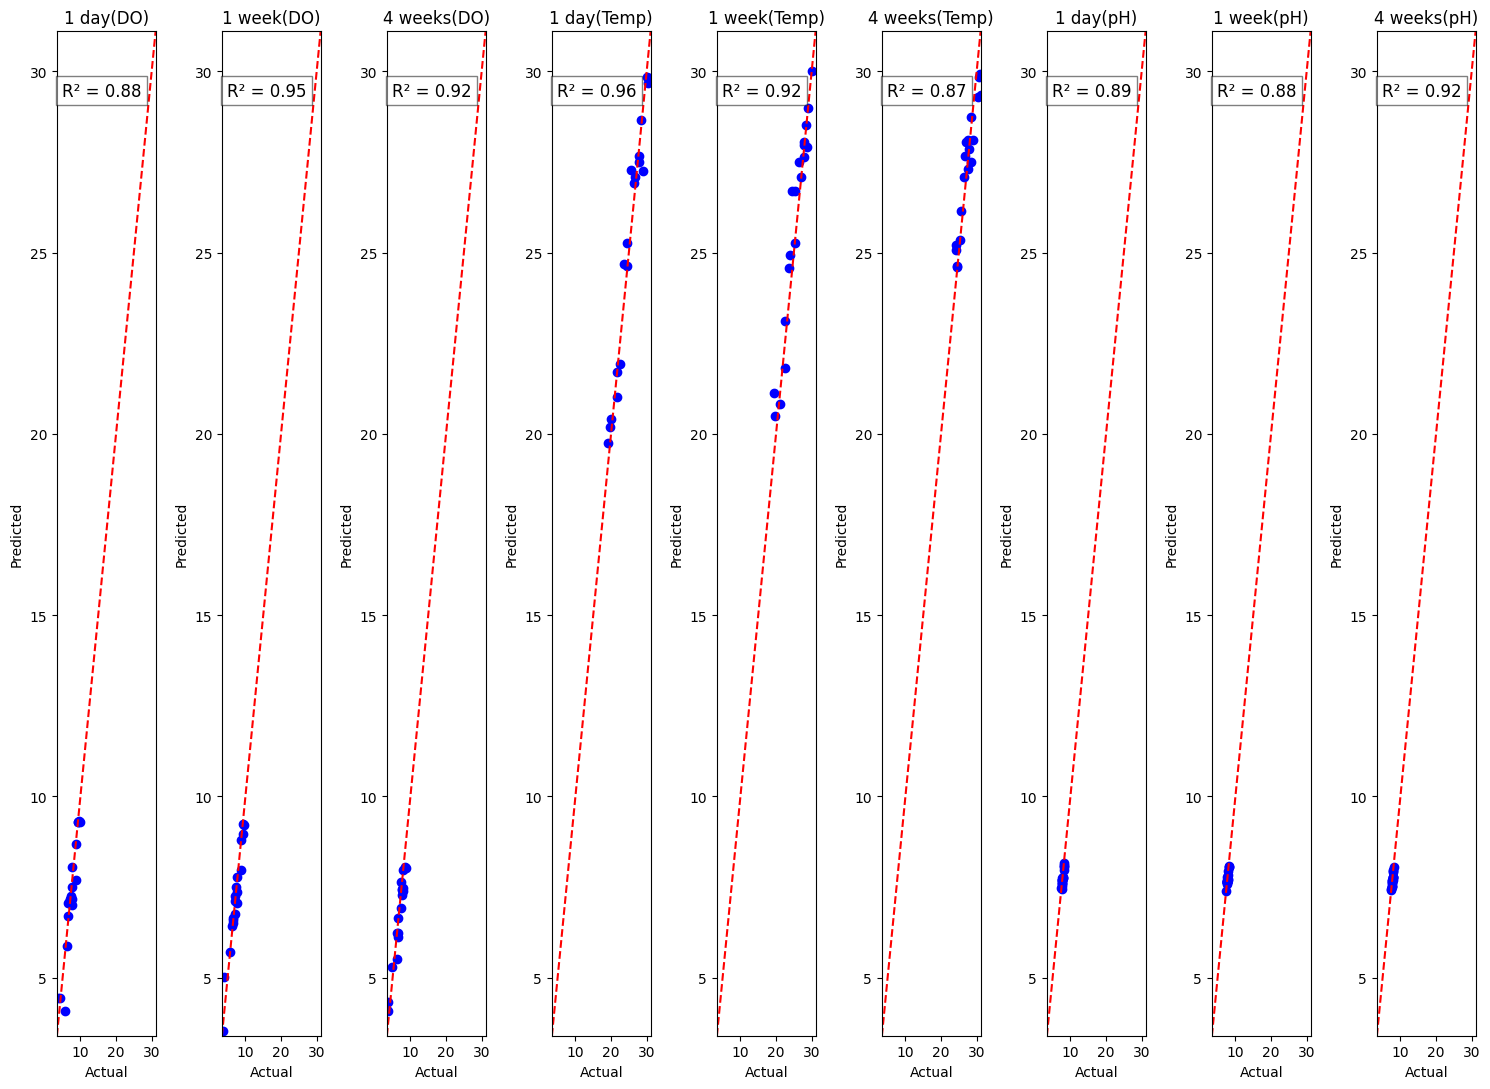

In [ ]:
# Number of features
n_features = y_test.shape[1]

# Create subplots
fig, axes = plt.subplots(1, n_features, figsize=(15, 11))

# Titles for each subplot
titles = ['1 day(DO)', '1 week(DO)', '4 weeks(DO)', '1 day(Temp)', '1 week(Temp)', '4 weeks(Temp)', '1 day(pH)', '1 week(pH)', '4 weeks(pH)']

# Determine common axis limits
x_min = min(y_test.min(), y_pred.min())
x_max = max(y_test.max(), y_pred.max())

for i in range(n_features):
    axes[i].scatter(y_test[:, i], y_pred[:, i], c='blue')
    axes[i].plot([x_min, x_max], [x_min, x_max], 'r--')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(x_min, x_max)
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(titles[i])

    # Calculate and annotate R² value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.05, 0.95, f'R² = {r2:.2f}', transform=axes[i].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))



plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.3027906198830414
R-squared: 0.9103060147540858
The accuracy of our model is 91.0%
Mean Absolute Error: 0.34809356725146245
